# Importing Libraries

In [35]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Reading the Data

In [36]:
df = pd.read_csv(r"C:\Users\Ketan\Downloads\CarPrice_Assignment.csv")
#df = pd.read_csv(r"C:\Users\Ketan\Downloads\train.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Feature selection 


Size= Carwidth + Carheight + Carweight
mpg = citympg + highwaympg

In [37]:
sum = df["carwidth"] * df["carheight"]  *df["curbweight"]
mpg = df["citympg"] +df["highwaympg"]
df["Size"]=np.power(sum,1/3)
df["mpg"]=mpg/2
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Size,mpg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,199.752593,24.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,199.752593,24.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,213.187214,22.5
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,203.285083,27.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,216.742561,20.0


CHoosing only valuable values in the Data 

In [38]:
df = df [["fueltype","doornumber","carbody","Size","enginetype","cylindernumber","enginesize","horsepower","peakrpm","mpg","price"]]
df.head()

,fueltype,doornumber,carbody,Size,enginetype,cylindernumber,enginesize,horsepower,peakrpm,mpg,price
0,gas,two,convertible,199.752593,dohc,four,130,111,5000,24.0,13495.0
1,gas,two,convertible,199.752593,dohc,four,130,111,5000,24.0,16500.0
2,gas,two,hatchback,213.187214,ohcv,six,152,154,5000,22.5,16500.0
3,gas,four,sedan,203.285083,ohc,four,109,102,5500,27.0,13950.0
4,gas,four,sedan,216.742561,ohc,five,136,115,5500,20.0,17450.0


Changing STRING to INT

In [39]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['four','six','five','three','twelve','two','eight'])
df["cylindernumber"] = le_sex.transform(df["cylindernumber"]) 

Etype = preprocessing.LabelEncoder()
Etype.fit(['dohc','ohcv','ohc','l','rotor','ohcf','dohcv'])
df["enginetype"] = Etype.transform(df["enginetype"])

Cbody = preprocessing.LabelEncoder()
Cbody.fit(['convertible','hatchback','sedan','wagon','hardtop'])
df["carbody"] = Cbody.transform(df["carbody"]) 
#df["cylindernumber"] = df["cylindernumber"].astype({"four": int, "five": int})

In [40]:
df.head(20)

,fueltype,doornumber,carbody,Size,enginetype,cylindernumber,enginesize,horsepower,peakrpm,mpg,price
0,gas,two,0,199.752593,0,2,130,111,5000,24.0,13495.000
1,gas,two,0,199.752593,0,2,130,111,5000,24.0,16500.000
2,gas,two,2,213.187214,5,3,152,154,5000,22.5,16500.000
3,gas,four,3,203.285083,3,2,109,102,5500,27.0,13950.000
4,gas,four,3,216.742561,3,1,136,115,5500,20.0,17450.000
5,gas,two,3,206.658907,3,1,136,110,5500,22.0,15250.000
6,gas,four,3,224.471392,3,1,136,110,5500,22.0,17710.000
7,gas,four,4,227.328891,3,1,136,110,5500,22.0,18920.000
8,gas,four,3,230.941499,3,1,131,140,5500,18.5,23875.000
9,gas,two,2,220.902166,3,1,131,160,5500,19.0,17859.167


Changing binary String to Binary int

In [41]:
from sklearn.preprocessing import LabelBinarizer
df["doornumber"] = LabelBinarizer().fit_transform(df.doornumber)
df["fueltype"] = LabelBinarizer().fit_transform(df.fueltype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fueltype        205 non-null    int32  
 1   doornumber      205 non-null    int32  
 2   carbody         205 non-null    int32  
 3   Size            205 non-null    float64
 4   enginetype      205 non-null    int32  
 5   cylindernumber  205 non-null    int32  
 6   enginesize      205 non-null    int64  
 7   horsepower      205 non-null    int64  
 8   peakrpm         205 non-null    int64  
 9   mpg             205 non-null    float64
 10  price           205 non-null    float64
dtypes: float64(3), int32(5), int64(3)
memory usage: 13.7 KB


In [42]:
df.head()

,fueltype,doornumber,carbody,Size,enginetype,cylindernumber,enginesize,horsepower,peakrpm,mpg,price
0,1,1,0,199.752593,0,2,130,111,5000,24.0,13495.0
1,1,1,0,199.752593,0,2,130,111,5000,24.0,16500.0
2,1,1,2,213.187214,5,3,152,154,5000,22.5,16500.0
3,1,0,3,203.285083,3,2,109,102,5500,27.0,13950.0
4,1,0,3,216.742561,3,1,136,115,5500,20.0,17450.0


# DATA VISULIZATION

Scattering

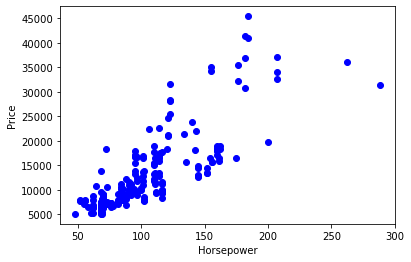

In [43]:
plt.scatter(df.horsepower, df.price,color='Blue')
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

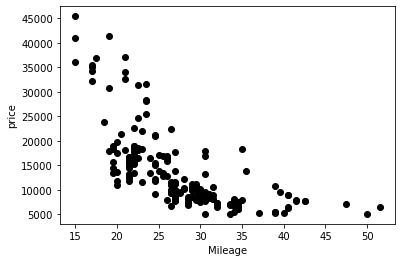

In [44]:
plt.scatter(df.mpg,df.price,color='black')
plt.xlabel("Mileage")
plt.ylabel("price")
plt.show

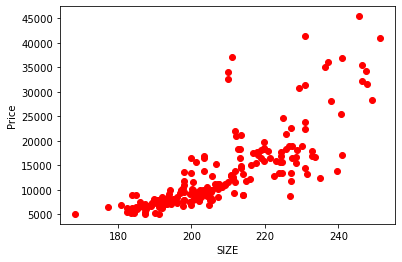

In [45]:
plt.scatter(df.Size,df.price,color='red')
plt.xlabel("SIZE")
plt.ylabel("Price")
plt.show()

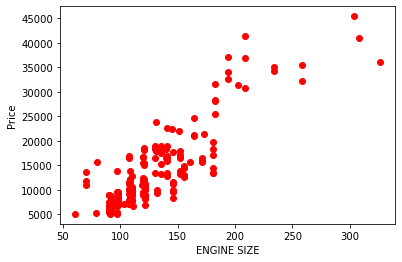

In [46]:
plt.scatter(df.enginesize,df.price,color='red')
plt.xlabel("ENGINE SIZE")
plt.ylabel("Price")
plt.show()

# SEABORN

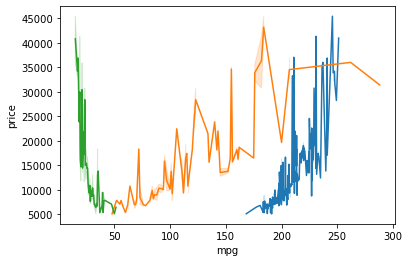

In [47]:
# import module
import seaborn as sns
# ploting lineplot
sns.lineplot( df['Size'], df['price'])
sns.lineplot(df['horsepower'],df['price'])
sns.lineplot(df['mpg'],df['price'])


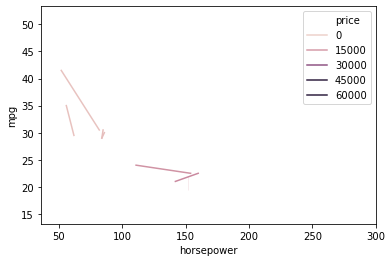

In [48]:
sns.lineplot(df['horsepower'],df['mpg'], hue =df["price"])

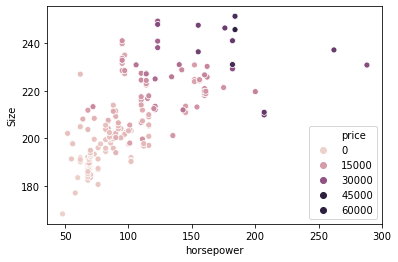

In [49]:
sns.scatterplot( df['horsepower'], df['Size'],hue =df["price"])

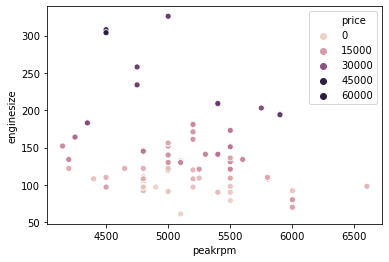

In [50]:
#df['mpg'],df['cylindernumber'],df['peakrpm'],df['doornumber'],df['enginesize'] 
sns.scatterplot(df['peakrpm'],df['enginesize'],hue = df['price'])

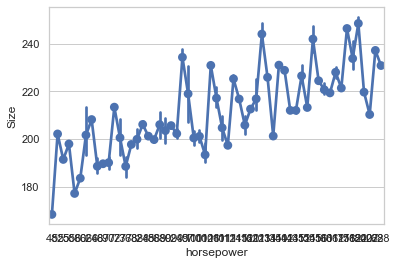

In [51]:
sns.set(style = 'whitegrid')
 

sns.pointplot(x = df["horsepower"], y = df["Size"], df = df)

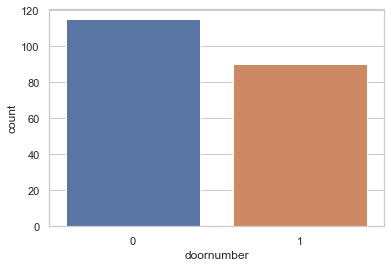

In [52]:
sns.set(style = 'whitegrid')
sns.countplot(df["doornumber"])

# Splitting the DATA

In [53]:
x = df.drop(['price'],axis=1).values

In [54]:
y = df['price'].values

In [55]:
print(x)

[[1.00e+00 1.00e+00 0.00e+00 ... 1.11e+02 5.00e+03 2.40e+01]
 [1.00e+00 1.00e+00 0.00e+00 ... 1.11e+02 5.00e+03 2.40e+01]
 [1.00e+00 1.00e+00 2.00e+00 ... 1.54e+02 5.00e+03 2.25e+01]
 ...
 [1.00e+00 0.00e+00 3.00e+00 ... 1.34e+02 5.50e+03 2.05e+01]
 [0.00e+00 0.00e+00 3.00e+00 ... 1.06e+02 4.80e+03 2.65e+01]
 [1.00e+00 0.00e+00 3.00e+00 ... 1.14e+02 5.40e+03 2.20e+01]]


In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.2,random_state = 0)

# Multiple Linear Regression Model

In [57]:
from sklearn.linear_model import LinearRegression
ml= LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [33]:
x.shape

(205, 10)

In [58]:
y_pred = ml.predict(x_test)
print(y_pred)

[ 4973.73523738 17488.97751781 13139.00466568 -1628.84036189
 11560.08503236 16131.87520439  6061.95989207  5071.74328765
 22435.07934417  8108.68508623 13081.91110754 31480.00624342
  9675.0763327  13432.98252464  5688.43936703 13813.0219095
 11542.73154596 16377.5732952  11240.17570722  6499.7962246
 11320.76353821 14345.20265939 11903.13133812 14499.98147842
 19627.85186081  6218.80616736  5713.39767248 13382.58376266
  7611.38881477  4259.87083079  8133.76423682 10612.37893899
 18275.72647375  8775.02071888  6223.2028463  25667.79856889
 14302.80481854 16052.62660792  5505.29803903 38457.96024365
  3800.19395293]


In [59]:
ml.predict([[1,1,0,199.752593,0,2,130,111,5000,24.0]])

array([14009.37414929])

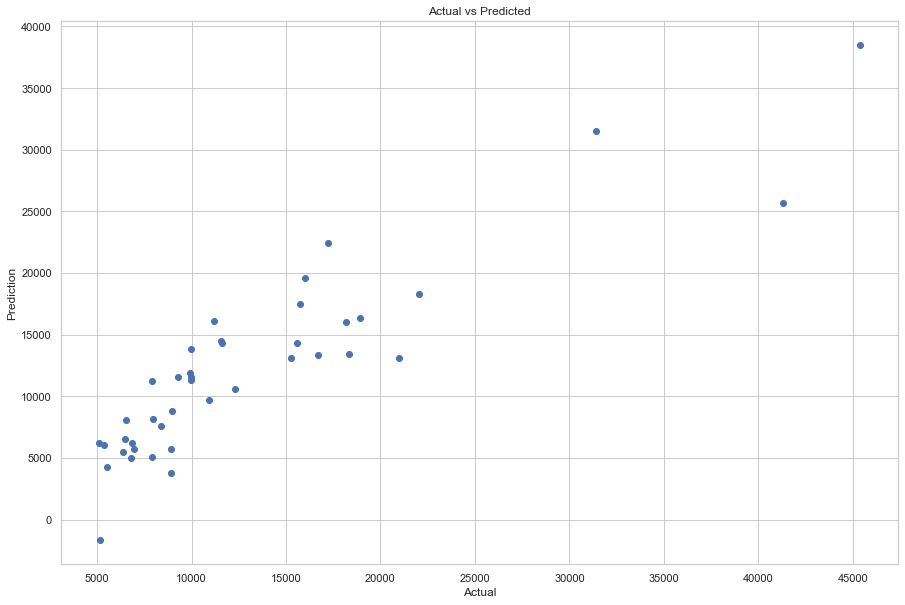

In [60]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Actual vs Predicted")
plt.show()

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.794698810598895

In [62]:
print('Variance score: %.2f' % ml.score(x_test, y_test))

Variance score: 0.79
